# Are Fandango's Movie Ratings still biased?

In 2015, Walt Hickey, a data journalist, analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) which showed how the website rounded up the ratings, for example a 4.1 rating was rounded up to 4.5 stars. 

In this project, our goal is to determine whether there has been any changes in Fandango's rating system, after the publishing of Hickey's article. 

## Understanding the data

Let's start by reading the original data set Hickey used for his analysis, and also a data set on movies released in 2018 and 2017 provided by Dataquest. According to each of their README.md files:

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`movie_ratings_16_17.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

In [78]:
import pandas as pd 

fandango = pd.read_csv('fandango_score_comparison.csv')

movies_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [79]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [80]:
movies_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [81]:
fandango_prev = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

fandango_after = movies_16_17[['movie', 'year', 'fandango']]

## Changing the goal of our analysis

The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. Specifically, we are interested in sampling the population from 2015 and 2016/2017 (before and after Hickey's article. 

First of all, the sampling is not random, given that the first data set considers movies that had at least 30 fan reviews on Fandango therefore some movies didn't have a chance of being selected. The second data set also isn't random because they only consider movies that had a considerable number of votes and reviews, and the criterea used to determine what is "considerable" is unclear. 

Because of these particularities in our dataset, we have two options: collect new data or change the goal of our analysis. For this project **we will chose to change our goal, which now is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.**


## Isolating the Samples

Since we changed our goal to comparing Fandango's ratings of popular movies in 2015 and 2016, we also have to define what we consider as "popular." We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

### All Fandango's ratings for popular movies released in 2015

We already know the first dataset fits the "popular" criteria, let's just make sure all the movies are from 2015.

In [82]:
sum(fandango_prev['Fandango_votes'] < 30) # showing that we don't have movies with less than 30 ratings. 

0

In [83]:
fandango_prev['Year'] = fandango_prev['FILM'].copy().str[-5:-1]
fandango_prev

C:\Users\catha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0,2014
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [84]:
fandango_prev['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

As we can see from the result above, 17 of the movies are from 2014. We'll isolate only the movies from 2015.

In [85]:
fandango_2015 = fandango_prev[fandango_prev['Year'] == '2015']

In [86]:
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

### All Fandango's ratings for popular movies released in 2016.

Now let's isolate all the Fandango's ratings for popular movies released in 2016 using the second dataset. 

In [87]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [88]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

We don't have the information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [89]:
fandango_2016.sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


In [91]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

The next step would be to check on the Fandango website the number of ratings, however I recieve the following message when I try to access the Fandango website: 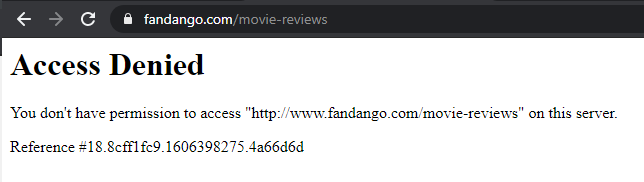

Let's assume they do have more than 30 ratings, given this is the idea of the Dataquest project. 

## Comparing Distribution Shapes for 2015 and 2016

Now that we have isolated the datasets for 2015 and 2016, we can start analyzing the two samples. 

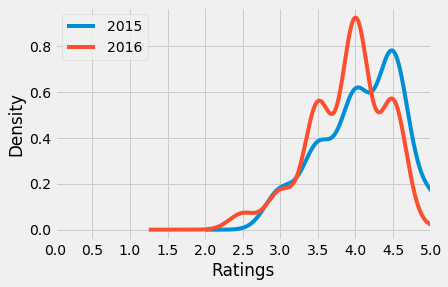

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()
plt.show()



The 2015 distribution is Left Skewed, as expected, given that the ratings were usually higher than expected in 2015. The 2016 resembles closely a normal distribution, however slightly left skewed.

The slight left shift of the 2016 distribution is relevant to our analysis because it shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [99]:
print('-'*10 + '2015' + '-'*10)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

----------2015----------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [100]:
print('-'*10 + '2016' + '-'*10)
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100

----------2016----------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016 there are movies with ratings lower than 3.0 stars, different from 2015 where no movies go below that rating. Also in 2016, less than 1% of the movies have 5 star ratings, compared to 2015 with almost 7%. Even with the frequency table, it is possible to notice the peak of 2015 being at 4.5 stars and lower percentages with lower stars which is what gives it it's skew to the left. The 2016 frequency table shows it's highest percentage (40%) at 4.0 stars and lower ratings to each side, making it slightly more normal however still left skewed. 

Even though we can see what is mentioned about with the frequency table, it's still easier to see with the kernel density plot.

## Determining the Direction of the Change

Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.


In [105]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

statistics = pd.DataFrame()
statistics['2015'] = [mean_2015, median_2015, mode_2015]
statistics['2016'] = [mean_2016, median_2016, mode_2016]
statistics.index = ['mean', 'median', 'mode']
statistics


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


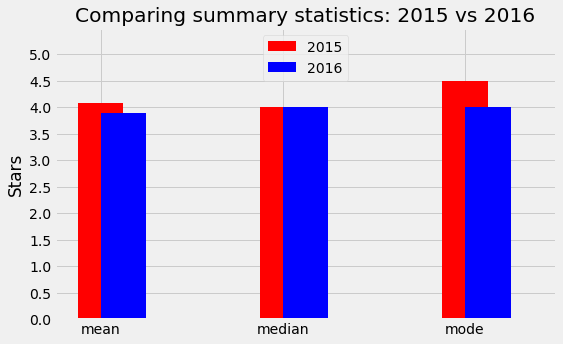

In [123]:
from numpy import arange

statistics['2015'].plot.bar(label = '2015', color = 'red', align = 'center', width = .25, rot = 0, legend = True)
statistics['2016'].plot.bar(label = '2016', color = 'blue', align = 'edge', width = .25, rot = 0, legend = True, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.show()

From the graph, we can deduce that the 2016 mean is about 0.2 lower than the 2015 mean, the median in both years are about the same, and the 2016 mode is about 0.5 lower than the 2015 mode. From this, we can say that on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

The analysis above showed that there is in fact a slight difference between Fandango's ratings for popular movies in 2015 and the ratings for popular movies in 2016. We concluded that, on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015. Even though we don't know exactly what caused the change, there is a good chance Fandango fixed the rating system after Hickey's article. 